In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel(r'../Cascade_Seismic_Stations.xlsx', sheet_name='Baker')
df_s=df#.iloc[0:210]
df_s=df_s.sort_values('Start Yr', ascending=True)
df_t=df_s.loc[df_s['Latitude']>0].reset_index(drop=True)

In [4]:
df_t

,Network,Name,Latitude,Longitude,Start Date,End Date,Start Yr,End Yr,"Classification: 1sp, 3sp, 3bb"
0,UW,MBW,48.784070,-121.901450,1972-09-11,2599-12-31 00:00:00,1972.0,2599.0,1sp
1,UW,MB2,48.783840,-121.900932,1985-09-24,1989-06-30 00:00:00,1985.0,1989.0,1sp
2,UW,SHUK,48.852840,-121.676950,2009-09-02,2599-12-31 00:00:00,2009.0,2599.0,3bb
3,UW,PUBD,48.652599,-121.688091,2019-07-01,2599-12-31 00:00:00,2019.0,2599.0,1sp
4,UW,SHUK,48.852840,-121.676950,2020-09-30,2599-12-31 00:00:00,2020.0,2599.0,3sp


In [5]:
sp1_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="1sp") & (df_t['End Yr']>=2022)
bb3_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="3bb")  & (df_t['End Yr']>=2022)
sp3_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="3sp")& (df_t['End Yr']>=2022)
if_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="IS")& (df_t['End Yr']>=2022)

sp1_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="1sp") & (df_t['End Yr']<2022)
bb3_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="3bb")  & (df_t['End Yr']<2022)
sp3_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="3sp")& (df_t['End Yr']<2022)
if_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="IS")& (df_t['End Yr']<2022)

In [6]:
df_t.loc[sp3_p]
df_t['Name_No_Temp']=df_t['Name']

## Loop for unique /name

['MBW' 'MB2' 'SHUK' 'PUBD']


C:\Users\penny\AppData\Local\Temp\ipykernel_17448\2950672191.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(name.tolist())#, rotation=90)


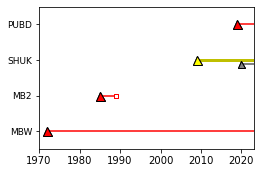

In [7]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10*(139.5/254)*0.7,4*(78.1/101.6)*0.85), sharey=True)

Unique_station=df_t['Name_No_Temp'].unique()
i=0
name=np.empty((len(Unique_station)),  np.dtype('U100'))
for station in Unique_station:
    #print(station)
    name[i]=str(df_t['Name_No_Temp'].loc[df_t['Name_No_Temp']==station].iloc[0])
    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="IS"):
        Stat_type_IS=((df_t['Name_No_Temp']==station)&(df_t['Classification: 1sp, 3sp, 3bb ']=="IS"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_IS],
                  df_t['End Yr'].loc[Stat_type_IS]], [i, i], '-', color='lightskyblue')
        ax1.plot([df_t['End Yr'].loc[Stat_type_IS],
                  df_t['End Yr'].loc[Stat_type_IS]], [i, i], 'sk', mec='lightskyblue',mfc='white', ms=8)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_IS],
                  df_t['Start Yr'].loc[Stat_type_IS]], [i+0.1, i], 'ok', mfc='lightskyblue', ms=4)

        
    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="1sp"):
        Stat_type_1sp=((df_t['Name_No_Temp']==station)&(df_t['Classification: 1sp, 3sp, 3bb ']=="1sp"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_1sp],
                  df_t['End Yr'].loc[Stat_type_1sp]], [i, i], '-r')
        ax1.plot([df_t['End Yr'].loc[Stat_type_1sp],
                  df_t['End Yr'].loc[Stat_type_1sp]], [i, i], 'sk', mec='red',mfc='white', ms=4)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_1sp],
                  df_t['Start Yr'].loc[Stat_type_1sp]], [i, i], '^k', mfc='red', ms=9)

    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="3bb"):
        Stat_type_3bb=((df_t['Name_No_Temp']==station)
                       &(df_t['Classification: 1sp, 3sp, 3bb ']=="3bb"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3bb],
                  df_t['End Yr'].loc[Stat_type_3bb]], [i, i], '-y', linewidth=3)
        ax1.plot([df_t['End Yr'].loc[Stat_type_3bb],
                  df_t['End Yr'].loc[Stat_type_3bb]], [i, i], 'sk', mec='k', mfc='white', ms=4, zorder=1000)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3bb],
                  df_t['Start Yr'].loc[Stat_type_3bb]], [i, i],  '^k', mfc='yellow', ms=9)

    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="3sp"):
        Stat_type_3sp=((df_t['Name_No_Temp']==station)
                       &(df_t['Classification: 1sp, 3sp, 3bb ']=="3sp"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3sp],
                  df_t['End Yr'].loc[Stat_type_3sp]], [i-0.1, i-0.1], '-', color='grey', linewidth=2, zorder=100)
        ax1.plot([df_t['End Yr'].loc[Stat_type_3sp],
                  df_t['End Yr'].loc[Stat_type_3sp]], [i-0.1, i-0.1], 'sk', mfc='white', ms=4, zorder=100)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3sp],
                  df_t['Start Yr'].loc[Stat_type_3sp]], [i-0.1, i-0.1], '^k', mfc='grey', ms=7, zorder=100)
        
        # Now print the lines
        
    i=i+1

#     if df_t['Classification: 1sp, 3sp, 3bb '].iloc[i]=="3bb":
#         ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-',
#                  color='y', lw=3)
#         ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='yellow', ms=12)
        
#     if df_t['Classification: 1sp, 3sp, 3bb '].iloc[i]=="3sp":
#         ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-',
#                  color='grey', lw=3)
#         ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='grey', ms=12)
        
        
#     #ax1.plot([df_t['Start Yr'].iloc[i],df_t['Start Yr'].iloc[i]], [i, i], '^k', mfc='white')
#     #ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='white', ms=8)
ax1.set_xlim([1970, 2023])
#     name[i]=str(df_t['Name'].iloc[i])
#     #print(df_t['Name'].iloc[i])
ax1.set_yticklabels(name.tolist())#, rotation=90)
ticks_loc = ax1.get_yticks().tolist()
ax1.set_yticks([0, 1, 2, 3])
ax1.set_ylim([-0.5, 3.5])
print(name)
ax1.set_yticklabels(name.tolist(), fontsize=9)

# #df_t['Classification: 1sp, 3sp, 3bb ']

fig.savefig('Baker_Seismic_Stations.png', dpi=300, bbox_inches="tight")

In [8]:
df_t

,Network,Name,Latitude,Longitude,Start Date,End Date,Start Yr,End Yr,"Classification: 1sp, 3sp, 3bb",Name_No_Temp
0,UW,MBW,48.784070,-121.901450,1972-09-11,2599-12-31 00:00:00,1972.0,2599.0,1sp,MBW
1,UW,MB2,48.783840,-121.900932,1985-09-24,1989-06-30 00:00:00,1985.0,1989.0,1sp,MB2
2,UW,SHUK,48.852840,-121.676950,2009-09-02,2599-12-31 00:00:00,2009.0,2599.0,3bb,SHUK
3,UW,PUBD,48.652599,-121.688091,2019-07-01,2599-12-31 00:00:00,2019.0,2599.0,1sp,PUBD
4,UW,SHUK,48.852840,-121.676950,2020-09-30,2599-12-31 00:00:00,2020.0,2599.0,3sp,SHUK


In [9]:
name_plot=np.empty((len(df_t)),  np.dtype('U100'))
for i in range(0, len(df_t)):
    name_plot[i]=str(df_t['Name_No_Temp'].iloc[i])

In [10]:
df['Longitude'].unique()

array([-121.900932,         nan, -121.90145 , -121.688091, -121.67695 ])

In [11]:
df_t.loc[if_r]

,Network,Name,Latitude,Longitude,Start Date,End Date,Start Yr,End Yr,"Classification: 1sp, 3sp, 3bb",Name_No_Temp


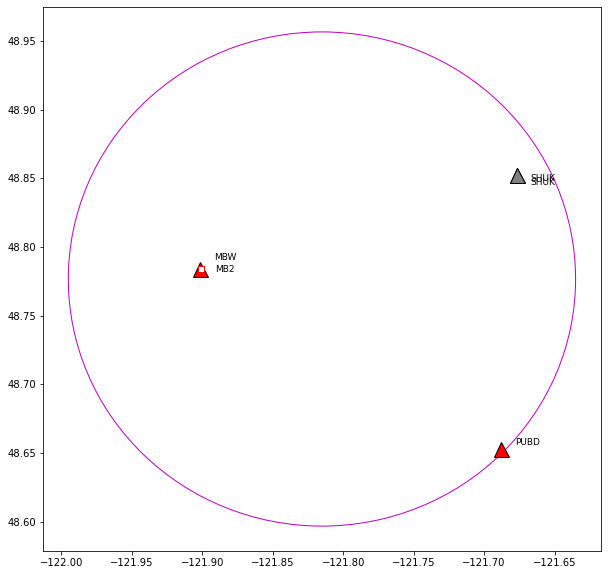

In [12]:
fig, (ax1) = plt.subplots(1, figsize=(10,10), sharey=True)

import matplotlib.patches as patches
rect = patches.Circle((-121.81505,48.77675),0.18,linewidth=1,edgecolor='m',facecolor='none', label='test')

# Add the patch to the Axes
ax1.add_patch(rect)

ax1.plot(df_t['Longitude'].loc[if_p],
              df_t['Latitude'].loc[if_p],
         '^k', mfc='cyan', ms=5)

ax1.plot(df_t['Longitude'].loc[if_r],
              df_t['Latitude'].loc[if_r],
         'sk', mec='cyan', mfc='white', ms=5)

ax1.plot(df_t['Longitude'].loc[sp1_p],
              df_t['Latitude'].loc[sp1_p],
         '^k', mfc='red', ms=15)
ax1.plot(df_t['Longitude'].loc[bb3_p],
              df_t['Latitude'].loc[bb3_p],
         '^k', mfc='yellow', ms=15)
ax1.plot(df_t['Longitude'].loc[sp3_p],
              df_t['Latitude'].loc[sp3_p],
         '^k', mfc='grey', ms=15)


ax1.plot(df_t['Longitude'].loc[sp1_r],
              df_t['Latitude'].loc[sp1_r],
         'sr',  mfc='w')
ax1.plot(df_t['Longitude'].loc[bb3_r],
              df_t['Latitude'].loc[bb3_r],
         'sy',  mfc='w')
ax1.plot(df_t['Longitude'].loc[sp3_r],
              df_t['Latitude'].loc[sp3_r],
         's', mec='grey', mfc='w')
for i in range(0, len(df_t)):
    ax1.annotate(name_plot[i],
                 xy=(df_t['Longitude'].iloc[i]+0.01,
              df_t['Latitude'].iloc[i]+np.random.normal(0, 1)/100),
                 xycoords="data", fontsize=9)

In [ ]:
str(df_t['Name'].values)

## Different plots showing age progresion

In [ ]:
a=['Exp Pet', 'Exp Pet', 'MT', 'Seismics']
type(a)

In [ ]:
name=np.empty(len(df_t), np.dtype('U100'))
df_t['Name'].iloc[1]
name[1]=str(df_t['Name'].iloc[1])

In [ ]:
name

In [18]:
len(name)

2

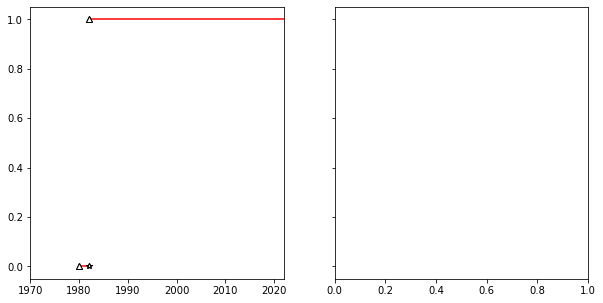

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
for i in range(0, len(df_t)):

    ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-r')
    ax1.plot([df_t['Start Yr'].iloc[i],df_t['Start Yr'].iloc[i]], [i, i], '^k', mfc='white')
    ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='white')
    ax1.set_xlim([1970, 2022])
#df_t['Classification: 1sp, 3sp, 3bb ']

# 0  Bar for each different seimometer

## 1. CDF function